In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [76]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.6+ MB


In [83]:
print(len(session_grouped))
print(len(X))
print(len(Y))
print(len(X)+len(Y))

135483
73815
61668
135483


In [74]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('input/train_users_2.csv')
session_df = pd.read_csv('input/sessions.csv')
test_df    = pd.read_csv('input/test_users.csv')

# preview the data
airbnb_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [48]:
session_df['secs_elapsed'].fillna(0,inplace=True)


In [49]:
session_grouped = session_df.groupby('user_id').agg({'action': 'count',
                                                    'device_type':'first',
                                                    'secs_elapsed':sum})

session_grouped.head()

,device_type,secs_elapsed,action
user_id,,,
00023iyk9l,Mac Desktop,867896,39
0010k6l0om,Mac Desktop,586543,63
001wyh0pz8,Android App Unknown Phone/Tablet,282965,90
0028jgx1x1,-unknown-,297010,31
002qnbzfs5,iPhone,6487080,782


In [50]:
X = pd.merge(airbnb_df,session_grouped,left_on='id',right_index=True,how='inner')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 137021 to 213450
Data columns (total 19 columns):
id                         73815 non-null object
date_account_created       73815 non-null object
timestamp_first_active     73815 non-null int64
date_first_booking         28774 non-null object
gender                     73815 non-null object
age                        41567 non-null float64
signup_method              73815 non-null object
signup_flow                73815 non-null int64
language                   73815 non-null object
affiliate_channel          73815 non-null object
affiliate_provider         73815 non-null object
first_affiliate_tracked    73513 non-null object
signup_app                 73815 non-null object
first_device_type          73815 non-null object
first_browser              73815 non-null object
country_destination        73815 non-null object
device_type                73815 non-null object
secs_elapsed               73815 non-null float64
act

In [81]:
Y = pd.merge(test_df,session_grouped,left_on='id',right_index=True,how='inner')
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61668 entries, 0 to 62095
Data columns (total 18 columns):
id                         61668 non-null object
date_account_created       61668 non-null object
timestamp_first_active     61668 non-null int64
date_first_booking         0 non-null float64
gender                     61668 non-null object
age                        33067 non-null float64
signup_method              61668 non-null object
signup_flow                61668 non-null int64
language                   61668 non-null object
affiliate_channel          61668 non-null object
affiliate_provider         61668 non-null object
first_affiliate_tracked    61662 non-null object
signup_app                 61668 non-null object
first_device_type          61668 non-null object
first_browser              61668 non-null object
device_type                61668 non-null object
secs_elapsed               61668 non-null float64
action                     61668 non-null int64
dtypes: float

In [51]:
X.secs_elapsed.sort_values()

193496           0
178634           0
153537           0
161936           0
170156           0
153536           0
178674           0
167227           0
153515           0
161960           0
153510           0
153491           0
178734           0
153443           0
140044           0
157627           0
138049           0
153410           0
141737           0
153599           0
169103           0
210441           0
167403           0
141679           0
157493           0
153705           0
169096           0
157517           0
161869           0
167344           0
            ...   
160225    17313962
190757    17410776
199102    17437843
192324    17457689
171061    17568042
190293    17659943
194595    17826996
207177    17871468
159405    17917697
181244    17993298
153254    18166881
148288    18278880
159917    18661486
148817    18695780
210613    18938536
212175    19206674
199019    19217362
151907    19219513
170414    20152270
138267    20589720
202293    21204044
196908    21

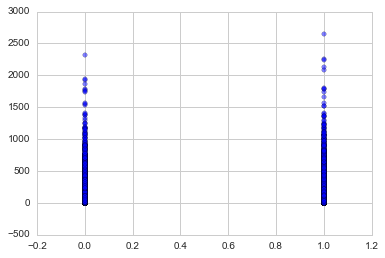

In [53]:
X['booked'] = X['country_destination']!='NDF'
plt.scatter(X['booked'],X['action'],alpha=0.5)


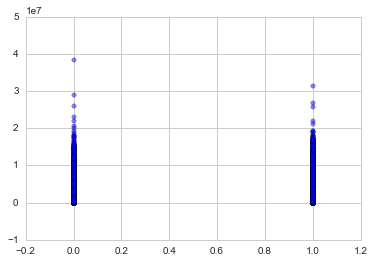

In [54]:

plt.scatter(X['booked'],X['secs_elapsed'],alpha=0.5)


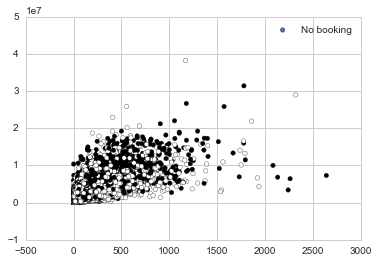

In [86]:

plt.scatter(X['action'],X['secs_elapsed'],c=X['booked'])
plt.legend(['No booking','Booked'])

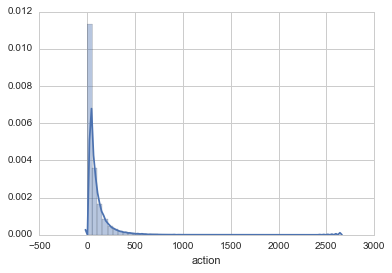

In [31]:
sns.distplot(X['action'],c=)

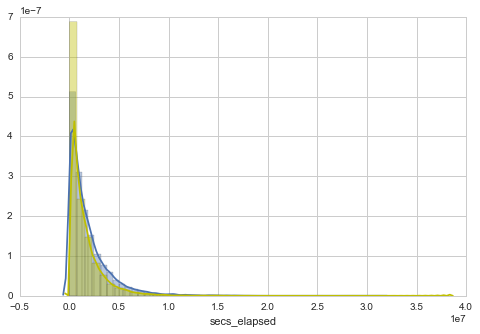

In [70]:
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(X[X['booked']==True]['secs_elapsed'],hist_kws={"normed":1})
sns.distplot(X[X['booked']==False]['secs_elapsed'],color='y',hist_kws={"normed":1})

In [73]:
print(sum(X['booked']))
len(X)

28774


73815

In [98]:
session_df.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')

In [99]:
A = session_df.groupby(['action','action_type']).count()['user_id'].sort_values(ascending=False)
A

action                     action_type 
show                       view            2081113
search_results             click            723124
personalize                data             704782
index                      view             677575
search                     click            529424
ajax_refresh_subtotal      click            486414
similar_listings           data             363423
update                     submit           350086
social_connections         data             335577
reviews                    data             317415
active                     -unknown-        187370
dashboard                  view             152515
header_userpic             data             141315
collections                view             122666
index                      -unknown-        111875
edit                       view             108531
create                     submit           105297
show                       -unknown-         97069
unavailabilities           data           

In [109]:
print(len(A[A>100]))
print(A[A>100])

248
action                                   action_type 
show                                     view            2081113
search_results                           click            723124
personalize                              data             704782
index                                    view             677575
search                                   click            529424
ajax_refresh_subtotal                    click            486414
similar_listings                         data             363423
update                                   submit           350086
social_connections                       data             335577
reviews                                  data             317415
active                                   -unknown-        187370
dashboard                                view             152515
header_userpic                           data             141315
collections                              view             122666
index                           